In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/kaggle/input/amazon-sales-dataset/Amazon 2_Raw.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [4]:
df.head(5)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [5]:
#check if data has any duplicates
df.duplicated().sum()

0

In [6]:
#checking nulls
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [7]:
#creating new column - Year
df['Year'] = df['Order Date'].dt.year

In [8]:
#Group profit by years
df.groupby('Year')['Profit'].sum().round()

Year
2011    20066.0
2012    20492.0
2013    23960.0
2014    43901.0
Name: Profit, dtype: float64

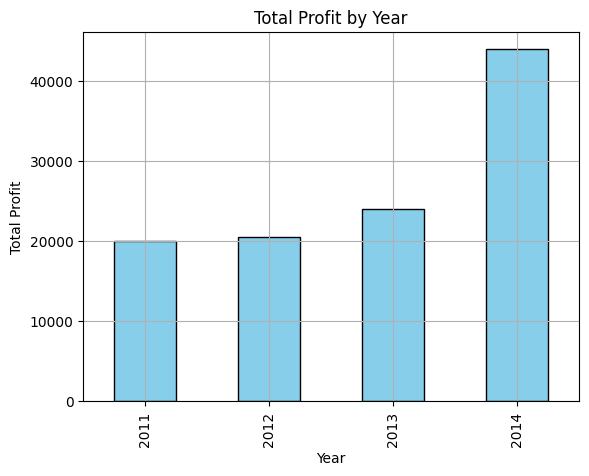

In [9]:
#visualisation profit by years
profit_by_year = df.groupby('Year')['Profit'].sum()
profit_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [10]:
#group sales by year
sales_by_year = df.groupby('Year')['Sales'].sum().round()
print(sales_by_year)

Year
2011    147883.0
2012    139966.0
2013    186976.0
2014    250633.0
Name: Sales, dtype: float64


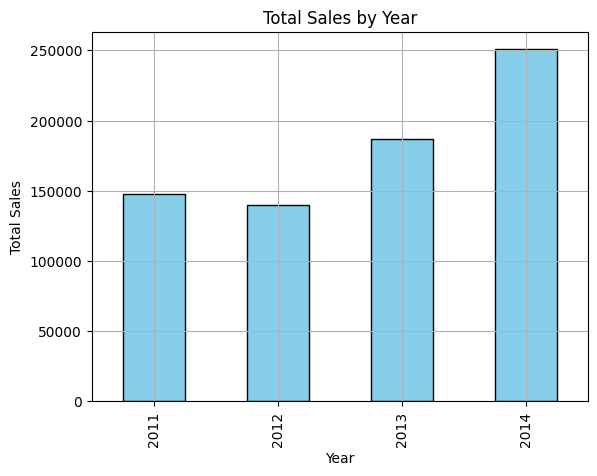

In [11]:
#visualisation sales by year
sales_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [12]:
#creating column extracting states only
df['State'] = df['Geography'].apply(lambda x: x.split(',')[-1])

In [13]:
#sales by states
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
print(sales_by_state)

State
California    457687.6315
Washington    138641.2700
Arizona        35282.0010
Colorado       32108.1180
Oregon         17431.1500
Nevada         16729.1020
Utah           11220.0560
Montana         5589.3520
New Mexico      4783.5220
Idaho           4382.4860
Wyoming         1603.1360
Name: Sales, dtype: float64


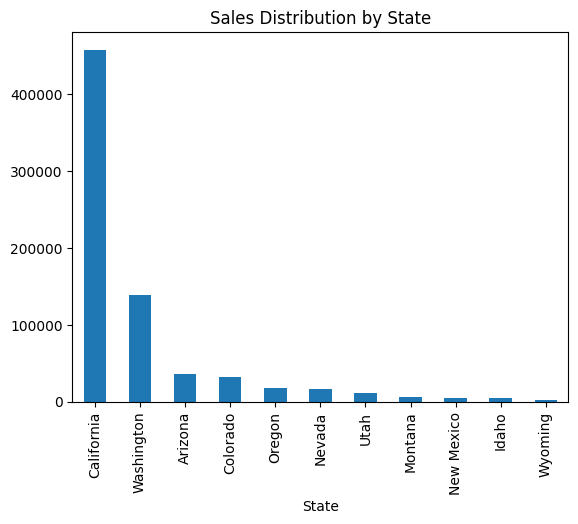

In [14]:
#visualisation sales by states
sales_by_state.plot(kind='bar' )
plt.title('Sales Distribution by State')
plt.show()

In [15]:
#Profit by Category and Year
profit_by_category_year = df.groupby(['Category', 'Year'])['Profit'].sum()
print(profit_by_category_year)

Category     Year
Accessories  2011    1937.6891
             2012    3149.7343
             2013    3972.3548
             2014    7424.8201
Appliances   2011    1066.9248
                       ...    
Supplies     2014    -164.6332
Tables       2011     730.1356
             2012    1202.5326
             2013    -976.0076
             2014     525.9467
Name: Profit, Length: 68, dtype: float64


In [16]:
#Profit by Category and Year (Pivoted)
pivot_profit_by_category_year = profit_by_category_year.unstack()
print(pivot_profit_by_category_year)

Year              2011       2012       2013        2014
Category                                                
Accessories  1937.6891  3149.7343  3972.3548   7424.8201
Appliances   1066.9248  1893.3539  1460.6667   3840.3245
Art           752.2946   543.2447   321.3531    757.2046
Binders      2534.5815  1026.5265  3808.2730   8727.4206
Bookcases      48.3519  -990.2307   325.8742  -1030.5071
Chairs       1231.6873   972.4391  1200.0448    623.4131
Copiers      1136.9796  2800.4348  3326.9334  12062.8873
Envelopes     292.6254   627.1604   738.3142    250.6624
Fasteners      79.2076    50.8463    63.4692     81.6676
Furnishings  1051.8535  1900.3060  2104.0199   2585.0910
Labels        409.8121   448.8689   519.4474    924.9939
Machines     1142.2598   938.3772  -115.7611  -2583.8023
Paper        2387.1297  2413.6979  3007.0784   4311.3304
Phones       2812.2671  1849.8546  2346.0440   2102.5769
Storage      2047.6064  1603.5345  1532.9522   3461.2291
Supplies      404.2852    61.51

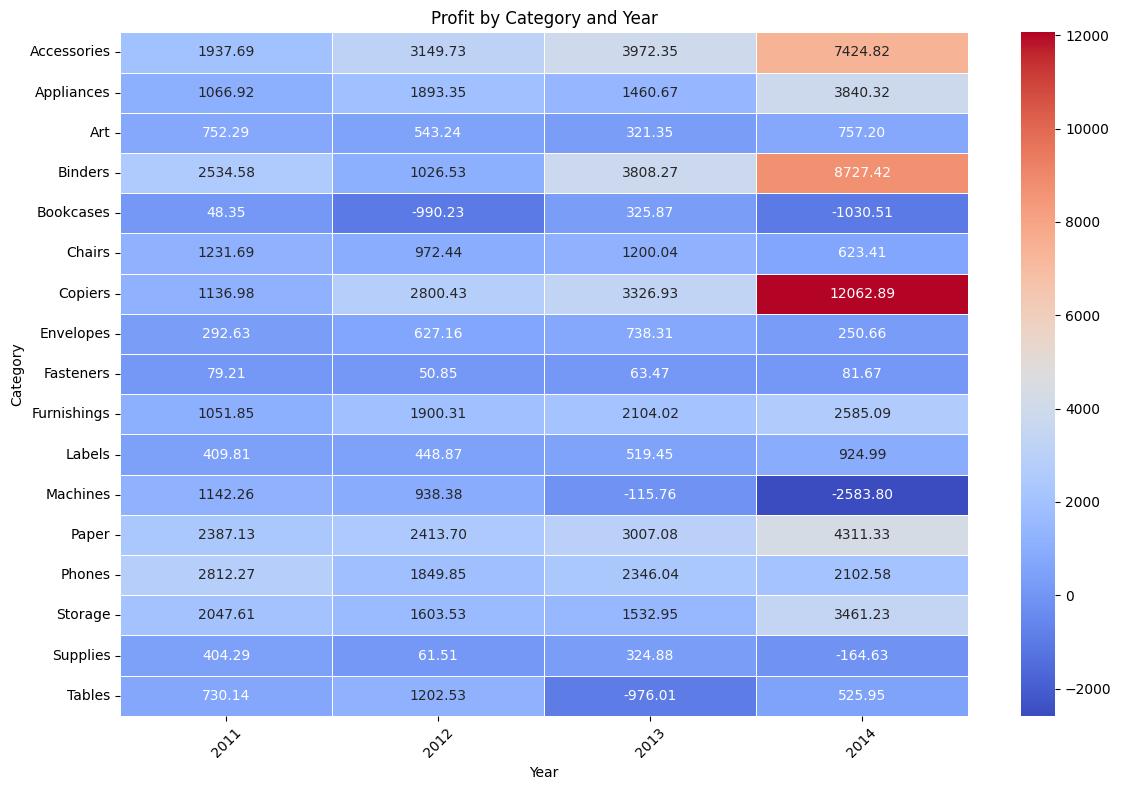

In [17]:
#creating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_profit_by_category_year, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Profit by Category and Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
# Top 10 customer emails
top_10_customers = df.groupby('EmailID')['Sales'].sum().sort_values(ascending = False).head(10)
print(top_10_customers)

EmailID
RaymondBuch@gmail.com      14345.2760
KenLonsdale@gmail.com       8472.3940
EdwardHooks@gmail.com       7447.7700
JaneWaco@gmail.com          7391.5300
KarenFerguson@gmail.com     7182.7660
NickCrebassa@gmail.com      6734.2330
ClayLudtke@gmail.com        6069.6440
YanaSorensen@gmail.com      5754.1720
NoraPreis@gmail.com         5564.5985
WilliamBrown@gmail.com      5523.0540
Name: Sales, dtype: float64
